# Importando as bibliotecas

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, date, time
from dateutil.parser import parse

## Importando o dataset

In [4]:
df = pd.read_csv("../dataset/dataset.csv", parse_dates=[3])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35717 entries, 0 to 35716
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   SystemCodeNumber  35717 non-null  object        
 1   Capacity          35717 non-null  int64         
 2   Occupancy         35717 non-null  int64         
 3   LastUpdated       35717 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 1.1+ MB


## Tratamento dos Dados

### Renomeando as colunas

In [5]:
columns_names = ["code_number", "capacity","occupancy", "last_update"]
df.columns = columns_names
df.head()

,code_number,capacity,occupancy,last_update
0,BHMBCCMKT01,577,61,2016-10-04 07:59:42
1,BHMBCCMKT01,577,64,2016-10-04 08:25:42
2,BHMBCCMKT01,577,80,2016-10-04 08:59:42
3,BHMBCCMKT01,577,107,2016-10-04 09:32:46
4,BHMBCCMKT01,577,150,2016-10-04 09:59:48


### Excluindo valores duplicados

In [6]:
print(df.shape)
df.drop_duplicates(keep='first',inplace=True)
print(df.shape)

(35717, 4)
(35501, 4)


### Excluindo dados faltantes

In [7]:
print(df.shape)
df.dropna( inplace=True)
print(df.shape)

(35501, 4)
(35501, 4)


### Excluindo/alterando dados inconsistentes

In [8]:
print(df.shape)
#Removendo ocupações menores que 0
df = df[df["occupancy"]>0]
print(df.shape)
#Removendo ocupação maior que capacidade
df = df[df["occupancy"]<=df["capacity"]]
print(df.shape)
#Removendo capacidades menores que zero
df = df[df["capacity"]>0]
print(df.shape)

(35501, 4)
(35472, 4)
(35099, 4)
(35099, 4)


### Convertendo a atualização para data


In [9]:
# def date_convert(x):
#     return parse(x)
# df["last_update"] = np.vectorize(date_convert)(df["last_update"])
#poderia ter sido utilizado o parsedat na importação
#Feito na importacao

### Criando os campos específicos para hora, dia, dia da semana e mês

In [10]:
df["hour"] = df["last_update"].dt.hour
df["day"] = df["last_update"].dt.day
df["weekday"] = df["last_update"].dt.weekday
df["month"] = df["last_update"].dt.month

### Criando um campo de intervalo de tempo

In [11]:
# df["days_of_measure"] = (df.last_update.max() - df.last_update.min())
# df.sort_values('days_of_measure')

### Criando campo dia de semana x fim de semana


In [12]:
def get_day_type(day):
    if(day<5):
        return "workday"
    else:
        return "weekend"


df["day_type"] = np.vectorize(get_day_type)(df["weekday"])
# df["day_type_name"] = df["day_type"].apply(lambda x: "workday" if x == 0 else "weekend")
# df

### Convertendo dia da semana para os nomes


In [13]:
#https://stackoverflow.com/questions/36341484/get-day-name-from-weekday-int
import calendar
weekday_name = list(calendar.day_abbr)
def convert_weekday_to_name(weekday_number):
    return str(weekday_name[weekday_number])
df["weekday"] = np.vectorize(convert_weekday_to_name)(df["weekday"])

### Criando campo de percentual de ocupação

In [14]:
df["occupancy_rate"] = (df["occupancy"] * 100)/ df["capacity"]
df

,code_number,capacity,occupancy,last_update,hour,day,weekday,month,day_type,occupancy_rate
0,BHMBCCMKT01,577,61,2016-10-04 07:59:42,7,4,Tue,10,workday,10.571924
1,BHMBCCMKT01,577,64,2016-10-04 08:25:42,8,4,Tue,10,workday,11.091854
2,BHMBCCMKT01,577,80,2016-10-04 08:59:42,8,4,Tue,10,workday,13.864818
3,BHMBCCMKT01,577,107,2016-10-04 09:32:46,9,4,Tue,10,workday,18.544194
4,BHMBCCMKT01,577,150,2016-10-04 09:59:48,9,4,Tue,10,workday,25.996534
...,...,...,...,...,...,...,...,...,...,...
35712,Shopping,1920,1517,2016-12-19 14:30:33,14,19,Mon,12,workday,79.010417
35713,Shopping,1920,1487,2016-12-19 15:03:34,15,19,Mon,12,workday,77.447917
35714,Shopping,1920,1432,2016-12-19 15:29:33,15,19,Mon,12,workday,74.583333
35715,Shopping,1920,1321,2016-12-19 16:03:35,16,19,Mon,12,workday,68.802083


## Análise Exploratória

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35099 entries, 0 to 35716
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   code_number     35099 non-null  object        
 1   capacity        35099 non-null  int64         
 2   occupancy       35099 non-null  int64         
 3   last_update     35099 non-null  datetime64[ns]
 4   hour            35099 non-null  int32         
 5   day             35099 non-null  int32         
 6   weekday         35099 non-null  object        
 7   month           35099 non-null  int32         
 8   day_type        35099 non-null  object        
 9   occupancy_rate  35099 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int32(3), int64(2), object(3)
memory usage: 2.5+ MB


In [16]:
df.describe().transpose()

,count,mean,min,25%,50%,75%,max,std
capacity,35099.0,1408.307188,220.0,577.0,863.0,2009.0,4675.0,1183.156426
occupancy,35099.0,645.663067,1.0,210.0,450.0,800.0,4327.0,660.538535
last_update,35099,2016-11-11 13:58:50.287159040,2016-10-04 07:46:28,2016-10-24 14:30:02,2016-11-11 12:00:21,2016-11-29 12:28:36,2016-12-19 16:30:35,NaN
hour,35099.0,11.799396,7.0,10.0,12.0,14.0,16.0,2.610412
day,35099.0,15.08929,1.0,8.0,14.0,22.0,31.0,8.270166
month,35099.0,10.877803,10.0,10.0,11.0,11.0,12.0,0.751485
occupancy_rate,35099.0,49.000886,0.078864,25.642965,46.974281,71.2,100.0,26.663371


In [17]:
df.drop(['code_number', 'day_type', 'weekday'], axis=1).corr()
pd.get_dummies(df, drop_first=True)

,capacity,occupancy,last_update,hour,day,month,occupancy_rate,code_number_BHMBCCPST01,code_number_BHMBCCSNH01,code_number_BHMBCCTHL01,...,code_number_Others-CCCPS8,code_number_Others-CCCPS98,code_number_Shopping,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,day_type_workday
0,577,61,2016-10-04 07:59:42,7,4,10,10.571924,False,False,False,...,False,False,False,False,False,False,False,True,False,True
1,577,64,2016-10-04 08:25:42,8,4,10,11.091854,False,False,False,...,False,False,False,False,False,False,False,True,False,True
2,577,80,2016-10-04 08:59:42,8,4,10,13.864818,False,False,False,...,False,False,False,False,False,False,False,True,False,True
3,577,107,2016-10-04 09:32:46,9,4,10,18.544194,False,False,False,...,False,False,False,False,False,False,False,True,False,True
4,577,150,2016-10-04 09:59:48,9,4,10,25.996534,False,False,False,...,False,False,False,False,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35712,1920,1517,2016-12-19 14:30:33,14,19,12,79.010417,False,False,False,...,False,False,True,True,False,False,False,False,False,True
35713,1920,1487,2016-12-19 15:03:34,15,19,12,77.447917,False,False,False,...,False,False,True,True,False,False,False,False,False,True
35714,1920,1432,2016-12-19 15:29:33,15,19,12,74.583333,False,False,False,...,False,False,True,True,False,False,False,False,False,True
35715,1920,1321,2016-12-19 16:03:35,16,19,12,68.802083,False,False,False,...,False,False,True,True,False,False,False,False,False,True


In [18]:
df['code_number'].value_counts().sort_values(ascending=True)

code_number
BHMBRTARC01           88
NIA North            137
BHMNCPNHS01         1026
BHMBCCTHL01         1067
BHMBRCBRG01         1088
BHMBRCBRG02         1150
BHMNCPRAN01         1174
BHMBRCBRG03         1180
Bull Ring           1180
NIA Car Parks       1199
NIA South           1199
BHMNCPPLS01         1253
BHMBCCPST01         1267
BHMEURBRD02         1270
BHMBCCSNH01         1278
BHMNCPLDH01         1280
Others-CCCPS133     1289
BHMNCPNST01         1299
BHMNCPHST01         1301
Broad Street        1306
BHMMBMMBX01         1306
BHMEURBRD01         1306
Shopping            1307
Others-CCCPS119a    1307
Others-CCCPS135a    1307
Others-CCCPS202     1307
Others-CCCPS8       1307
Others-CCCPS98      1307
Others-CCCPS105a    1307
BHMBCCMKT01         1307
Name: count, dtype: int64

In [19]:
pivot_table = df.pivot_table(values='occupancy_rate', index='code_number', aggfunc='mean', columns=['weekday','hour']).fillna(0)

In [20]:
df.pivot_table(values='last_update', index='code_number', aggfunc=['min', 'max']).sort_values(by=('min', 'last_update'))

,min,max
,last_update,last_update
code_number,,
BHMNCPPLS01,2016-10-04 07:46:28,2016-12-19 16:30:35
BHMBCCMKT01,2016-10-04 07:59:42,2016-12-19 16:30:35
Others-CCCPS8,2016-10-04 07:59:42,2016-12-19 16:30:35
Others-CCCPS202,2016-10-04 07:59:42,2016-12-19 16:30:35
Others-CCCPS135a,2016-10-04 07:59:42,2016-12-19 16:30:35
Others-CCCPS133,2016-10-04 07:59:42,2016-12-19 16:30:35
Others-CCCPS119a,2016-10-04 07:59:42,2016-12-19 16:30:35
Others-CCCPS105a,2016-10-04 07:59:42,2016-12-19 16:30:35


<Axes: xlabel='last_update', ylabel='occupancy_rate'>

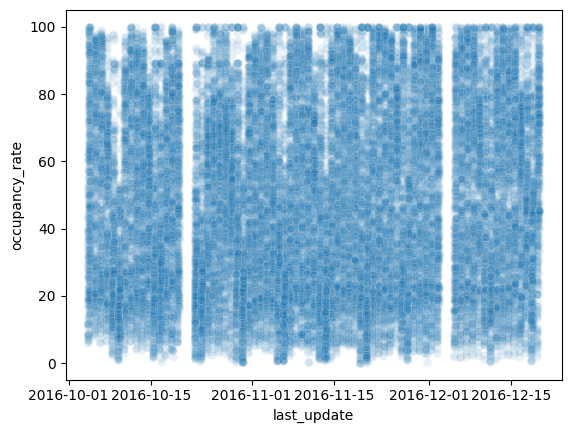

In [21]:
#Gráficos
sns.scatterplot(x='last_update',y='occupancy_rate',data=df, alpha=0.1)

<Axes: xlabel='occupancy_rate', ylabel='Count'>

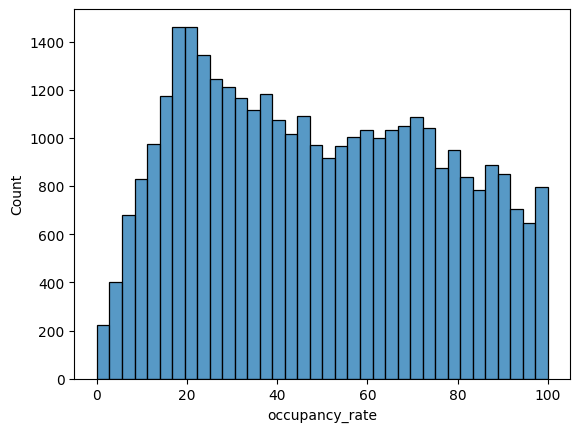

In [22]:
sns.histplot(data=df, x='occupancy_rate')

<Axes: xlabel='hour', ylabel='occupancy_rate'>

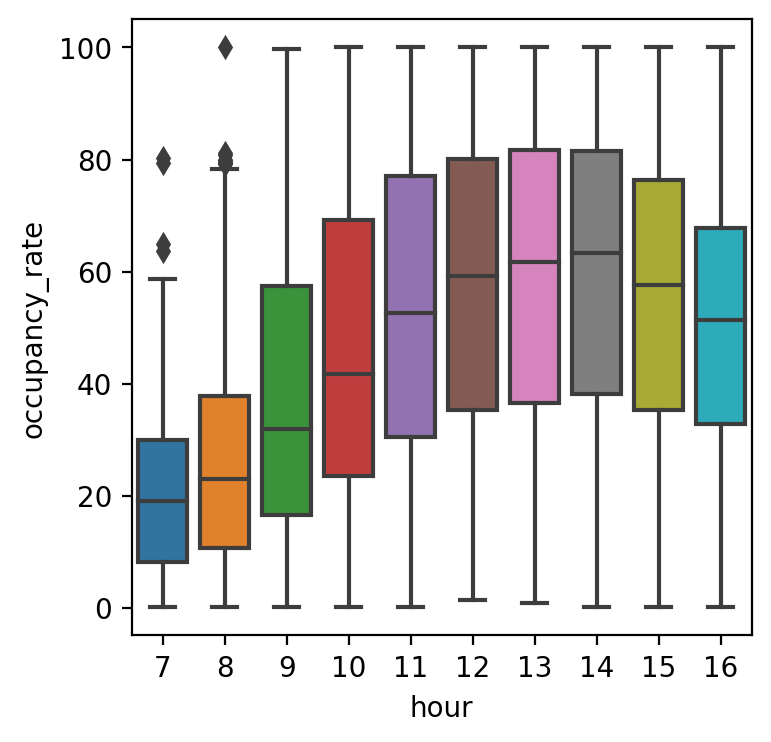

In [23]:
plt.figure(figsize=(4,4), dpi=200)
sns.boxplot(x='hour',y='occupancy_rate',data=df)

<Axes: xlabel='capacity', ylabel='occupancy_rate'>

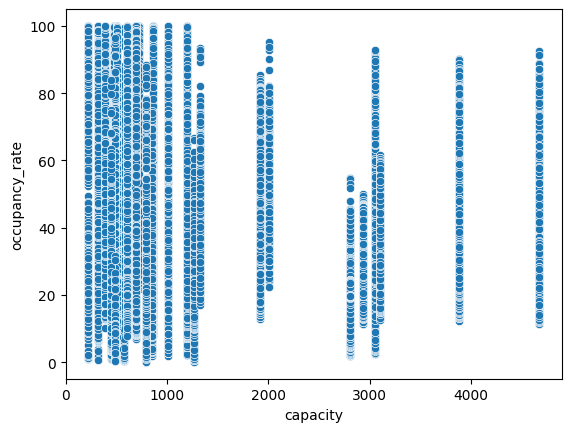

In [24]:
sns.scatterplot(data=df, x='capacity', y='occupancy_rate')

<Axes: xlabel='hour', ylabel='occupancy_rate'>

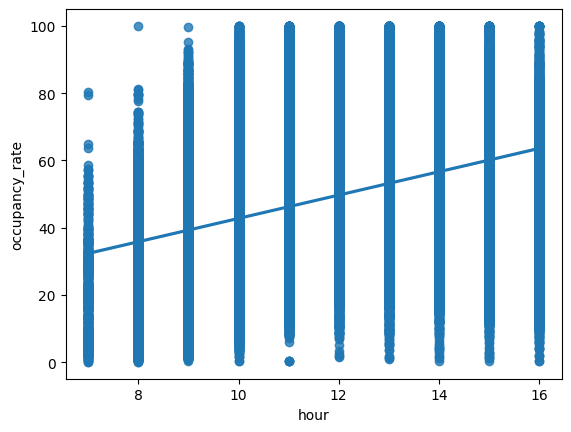

In [25]:
# sns.scatterplot(data=df, x='weekday', y='occupancy_rate')
sns.regplot(data=df, x='hour', y='occupancy_rate')

In [26]:
#Regressão linear
X = df['hour']
y = df['occupancy_rate']
np.polyfit(X,y, deg=1)

array([3.46900689, 8.06870039])

In [27]:
potential_hours = np.linspace(7,16,100)
predicted_occupancy_rate = (3.46900689 * potential_hours) + 8.06870039

In [28]:
potential_hours
predicted_occupancy_rate

array([32.35174862, 32.66711288, 32.98247715, 33.29784141, 33.61320567,
       33.92856993, 34.2439342 , 34.55929846, 34.87466272, 35.19002698,
       35.50539125, 35.82075551, 36.13611977, 36.45148404, 36.7668483 ,
       37.08221256, 37.39757682, 37.71294109, 38.02830535, 38.34366961,
       38.65903387, 38.97439814, 39.2897624 , 39.60512666, 39.92049093,
       40.23585519, 40.55121945, 40.86658371, 41.18194798, 41.49731224,
       41.8126765 , 42.12804076, 42.44340503, 42.75876929, 43.07413355,
       43.38949782, 43.70486208, 44.02022634, 44.3355906 , 44.65095487,
       44.96631913, 45.28168339, 45.59704765, 45.91241192, 46.22777618,
       46.54314044, 46.85850471, 47.17386897, 47.48923323, 47.80459749,
       48.11996176, 48.43532602, 48.75069028, 49.06605454, 49.38141881,
       49.69678307, 50.01214733, 50.3275116 , 50.64287586, 50.95824012,
       51.27360438, 51.58896865, 51.90433291, 52.21969717, 52.53506143,
       52.8504257 , 53.16578996, 53.48115422, 53.79651849, 54.11

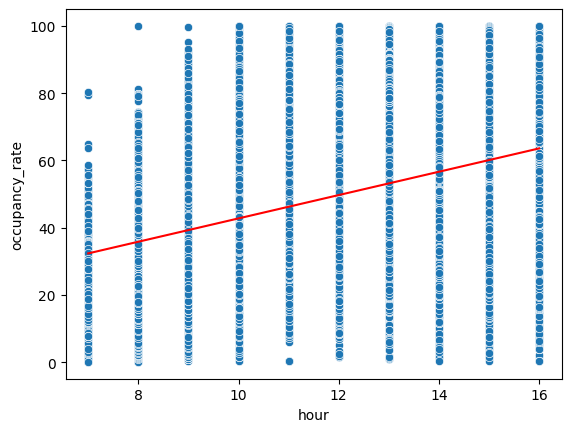

In [29]:
sns.scatterplot(x='hour', y='occupancy_rate', data=df)
plt.plot(potential_hours, predicted_occupancy_rate, color='red')

Aparentemente um modelo de regressão linear casa bem com o dataset

In [30]:
df2 = pd.get_dummies(data=df, drop_first=True).drop('last_update', axis=1)
df2.drop_duplicates(keep='first', inplace=True)
df2.dropna(inplace=True)
X = df2.drop('occupancy_rate', axis=1)

In [31]:
y = df2['occupancy_rate']

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
model = LinearRegression()

In [35]:
model.fit(X_train, y_train)

LinearRegression()

In [36]:
test_predicted = model.predict(X_test)

In [37]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [38]:
df['occupancy_rate'].mean()

49.000886444014675

<Axes: xlabel='occupancy_rate', ylabel='Count'>

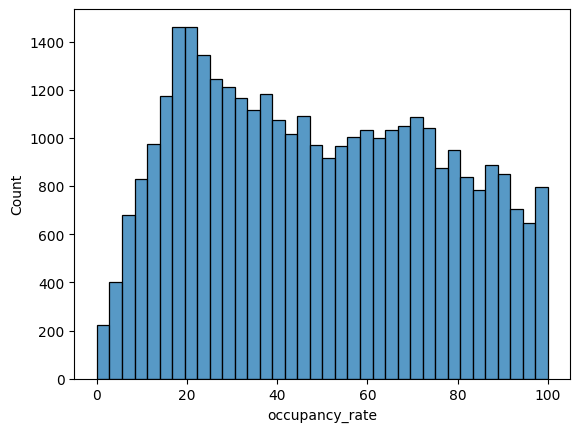

In [39]:
sns.histplot(df, x='occupancy_rate')

In [40]:
mean_absolute_error(y_test, test_predicted)

9.588619295316663

In [41]:
#RMSE
np.sqrt(mean_squared_error(y_test, test_predicted))

12.706661644569234

In [42]:
test_residuals = y_test - test_predicted

In [43]:
test_residuals

35079    -0.685121
30218   -14.021765
35048    -1.378292
2391    -14.517080
32577     0.501538
           ...    
9939    -14.331636
23144    -0.246734
1477      0.800268
4313     10.064754
32271    -2.511346
Name: occupancy_rate, Length: 10414, dtype: float64

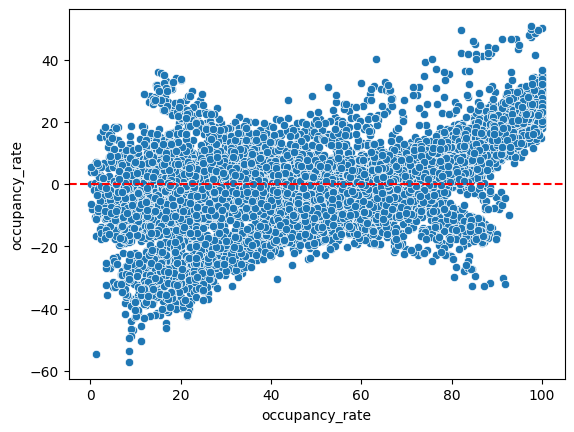

In [44]:
sns.scatterplot(x = y_test, y=test_residuals)
plt.axhline(y=0, color='red', ls='--')

<Axes: xlabel='occupancy_rate', ylabel='Count'>

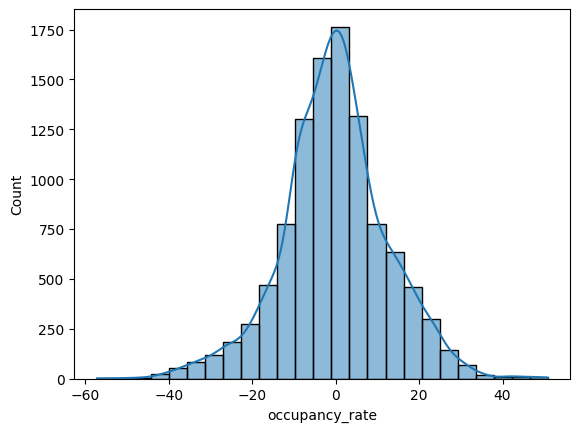

In [45]:
sns.histplot(test_residuals, bins=25, kde=True)

In [46]:
import scipy as sp

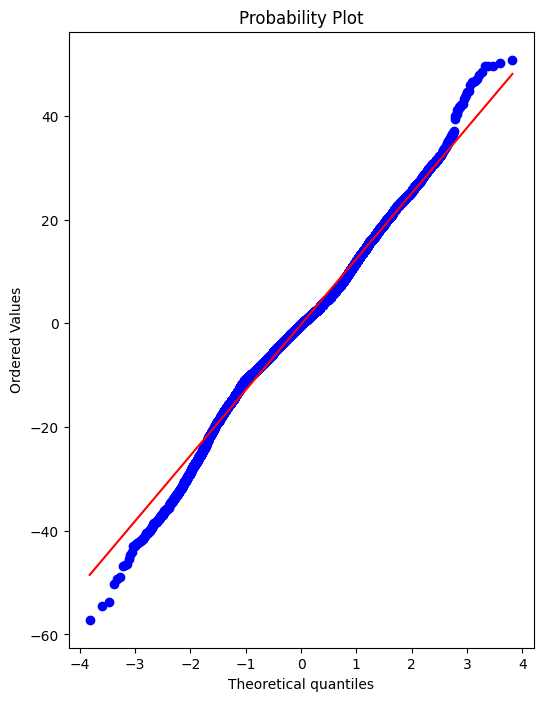

In [47]:
# Create a figure and axis to plot on
fig, ax = plt.subplots(figsize=(6,8),dpi=100)
# probplot returns the raw values if needed
# we just want to see the plot, so we assign these values to _
_ = sp.stats.probplot(test_residuals,plot=ax)

In [48]:
final_model = LinearRegression()

In [49]:
final_model.fit(X,y)

LinearRegression()

In [50]:
final_model.coef_

array([-1.21633876e-02,  3.56575838e-02,  1.72796906e+00,  2.85471344e-02,
        6.25595860e-01,  1.26347209e+01,  2.68423667e+01,  3.44042460e+01,
        2.19925153e+01,  1.14015270e+01,  9.25393306e-01,  4.12956282e+01,
        3.01419375e+01,  3.13678642e+01,  3.15118727e+01,  1.19374209e+01,
        3.17613890e+01,  3.36261746e+01,  2.53184537e+01, -7.46623141e+00,
        2.86174699e+01,  2.68790036e+01,  3.44561845e+00, -5.24329151e+00,
       -1.35191549e+01, -2.09333586e+00,  1.11553871e+01,  4.72519157e+00,
       -4.14847515e+00, -4.89121114e+00,  4.73817089e+00,  1.31872210e+01,
        4.87796078e+00,  1.15459874e+01,  3.40679214e-01,  1.63460707e+10,
        1.63460707e+10,  2.55859914e+00,  2.38081155e+00,  2.23707354e+00,
        1.63460707e+10])

In [51]:
len(df[df.occupancy_rate > 75])/len(df)
df

,code_number,capacity,occupancy,last_update,hour,day,weekday,month,day_type,occupancy_rate
0,BHMBCCMKT01,577,61,2016-10-04 07:59:42,7,4,Tue,10,workday,10.571924
1,BHMBCCMKT01,577,64,2016-10-04 08:25:42,8,4,Tue,10,workday,11.091854
2,BHMBCCMKT01,577,80,2016-10-04 08:59:42,8,4,Tue,10,workday,13.864818
3,BHMBCCMKT01,577,107,2016-10-04 09:32:46,9,4,Tue,10,workday,18.544194
4,BHMBCCMKT01,577,150,2016-10-04 09:59:48,9,4,Tue,10,workday,25.996534
...,...,...,...,...,...,...,...,...,...,...
35712,Shopping,1920,1517,2016-12-19 14:30:33,14,19,Mon,12,workday,79.010417
35713,Shopping,1920,1487,2016-12-19 15:03:34,15,19,Mon,12,workday,77.447917
35714,Shopping,1920,1432,2016-12-19 15:29:33,15,19,Mon,12,workday,74.583333
35715,Shopping,1920,1321,2016-12-19 16:03:35,16,19,Mon,12,workday,68.802083


Baseando-se nos resultados obtidos foi decidido criar um modelo de classificação em que as taxas de ocupação seriam divididas em quatro categorias: Vazio (<25%), Meio-Vazio([25-50%)), Meio-Cheio[50-75] e Cheio (>75%)

In [53]:
from sklearn.svm import SVC

In [54]:
df_dummized  = pd.get_dummies(df.drop(['occupancy_rate', 'last_update'], axis=1),drop_first=True)

In [55]:
df_dummized

,capacity,occupancy,hour,day,month,code_number_BHMBCCPST01,code_number_BHMBCCSNH01,code_number_BHMBCCTHL01,code_number_BHMBRCBRG01,code_number_BHMBRCBRG02,...,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,day_type_workday,occupancy_rate_classified_Full,occupancy_rate_classified_Half-Empty,occupancy_rate_classified_Half-Full
0,577,61,7,4,10,False,False,False,False,False,...,False,False,False,False,True,False,True,False,False,False
1,577,64,8,4,10,False,False,False,False,False,...,False,False,False,False,True,False,True,False,False,False
2,577,80,8,4,10,False,False,False,False,False,...,False,False,False,False,True,False,True,False,False,False
3,577,107,9,4,10,False,False,False,False,False,...,False,False,False,False,True,False,True,False,False,False
4,577,150,9,4,10,False,False,False,False,False,...,False,False,False,False,True,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35712,1920,1517,14,19,12,False,False,False,False,False,...,True,False,False,False,False,False,True,True,False,False
35713,1920,1487,15,19,12,False,False,False,False,False,...,True,False,False,False,False,False,True,True,False,False
35714,1920,1432,15,19,12,False,False,False,False,False,...,True,False,False,False,False,False,True,False,False,True
35715,1920,1321,16,19,12,False,False,False,False,False,...,True,False,False,False,False,False,True,False,False,True


In [57]:
#Criação dos agrupamentos 
def classifier(occupancy_rate):
    if(occupancy_rate < 25 ):
        return "Empty"
    elif(occupancy_rate>75):
        return "Full"
    elif(occupancy_rate>= 25 and occupancy_rate<=50):
        return "Half-Empty"
    else:
        return "Half-Full"
    
df_dummized['occupancy_rate_classified'] = np.vectorize(classifier)(df['occupancy_rate'])
df_dummized['occupancy_rate_classified'].value_counts()

occupancy_rate_classified
Half-Empty    10107
Half-Full      9131
Empty          8520
Full           7341
Name: count, dtype: int64

In [91]:
count = df_dummized['occupancy_rate_classified'].value_counts()
count.sum()
major_error = count.max() / count.sum()
print(major_error * 100)

28.795692184962533


In [58]:
y = df_dummized['occupancy_rate_classified']
X = df_dummized.drop('occupancy_rate_classified', axis=1)

In [133]:
#Separação dos testes para teste final
from sklearn.model_selection import train_test_split
X_start, X_test, y_start, y_test = train_test_split(X, y,test_size=0.2,random_state=42)

In [134]:
#Divisão para execução da validação cruzada
X_train, X_val, y_train, y_val = train_test_split(X_start, y_start,test_size=0.2,random_state=101)

In [ ]:
#Grid Search
#https://scikit-learn.org/stable/modules/grid_search.html#grid-search
# from sklearn.model_selection import GridSearchCV
# svm = SVC()
# param_grid = {'C':[10,100,1000, 10000],'kernel':['rbf', 'polynomial']}
# grid = GridSearchCV(svm,param_grid)
# grid.fit(X,y)
# grid.best_score_
# grid.best_params_

In [136]:
from sklearn.model_selection import GridSearchCV
# from sklearn.preprocessing import RobustScaler
svm = SVC()
param_grid = [{'C':[10,100,1000, 10000],'gamma': [0.001, 0.0001]}]
grid = GridSearchCV(svm,param_grid, n_jobs=-1, cv=10)

# scaler = RobustScaler()
# X_train = scaler.fit_transform(X_train, y_train)

In [137]:
grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': [10, 100, 1000, 10000],
                          'gamma': [0.001, 0.0001]}])

In [138]:
grid.best_score_

1.0

In [139]:
grid.best_params_

{'C': 10, 'gamma': 0.001}

## Rodando o modelo com o parâmetros melhor ajustados

In [150]:
model = SVC(kernel = 'rbf', C=10, gamma=0.001)
model.fit(X_start,y_start)

SVC(C=10, gamma=0.001)

In [151]:
y_pred = model.predict(X_test)
y_pred

array(['Full', 'Half-Empty', 'Half-Full', ..., 'Empty', 'Empty', 'Full'],
      dtype=object)

In [154]:
#https://scikit-learn.org/stable/modules/model_evaluation.html
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, ConfusionMatrixDisplay

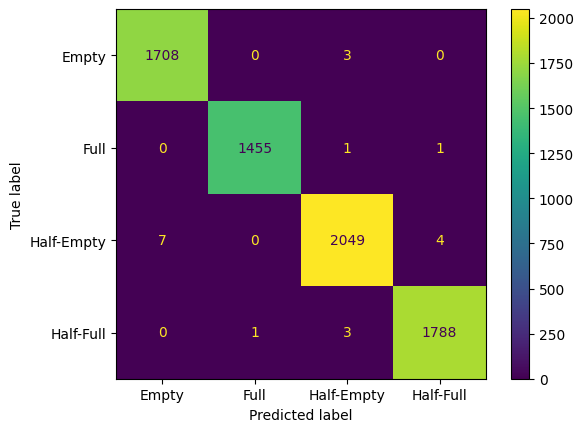

In [155]:
confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [157]:
accuracy_score(y_test, y_pred)

0.9971509971509972

In [158]:
print(precision_score(y_test, y_pred, average='macro'))

0.9972595656197253


In [159]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       Empty       1.00      1.00      1.00      1711
        Full       1.00      1.00      1.00      1457
  Half-Empty       1.00      0.99      1.00      2060
   Half-Full       1.00      1.00      1.00      1792

    accuracy                           1.00      7020
   macro avg       1.00      1.00      1.00      7020
weighted avg       1.00      1.00      1.00      7020



In [160]:
from sklearn.model_selection import cross_val_score
k_fold_acc = cross_val_score(model, X_train, y_train, cv=10)
k_fold_mean = k_fold_acc.mean()

In [189]:
k_fold_mean

1.0

In [200]:
model.predict(X.loc[[0]])

array(['Empty'], dtype=object)

In [207]:
print("Classificação: ", y[0], "\n",X.loc[0], )

Classificação:  Empty 
 capacity                                  577
occupancy                                  61
hour                                        7
day                                         4
month                                      10
code_number_BHMBCCPST01                 False
code_number_BHMBCCSNH01                 False
code_number_BHMBCCTHL01                 False
code_number_BHMBRCBRG01                 False
code_number_BHMBRCBRG02                 False
code_number_BHMBRCBRG03                 False
code_number_BHMBRTARC01                 False
code_number_BHMEURBRD01                 False
code_number_BHMEURBRD02                 False
code_number_BHMMBMMBX01                 False
code_number_BHMNCPHST01                 False
code_number_BHMNCPLDH01                 False
code_number_BHMNCPNHS01                 False
code_number_BHMNCPNST01                 False
code_number_BHMNCPPLS01                 False
code_number_BHMNCPRAN01                 False
code_numbe